*SIO221a Notes - Alford and Gille*

*Reading:  Bendat and Piersol, Ch. 5.2.1, Emory and Thomson 5.6.6*

Concepts covered: Windowing Spectra

# Lecture 11

*Recap*

Last time we looked at uncertainties, the sinc function and its impact on spectral segmenting.  Now we
need to look closely at windowing and its effect on our degrees of freedom.


**Windowing our data**

We left off saying that it would be useful to find a window (or "taper") that could
minimize the impact of discontinuities in our spectrum, avoiding a rectangular window
in favor of something with a smoother Fourier transform. Remember, the reason for this is that we think of an unwindowed time series of finite length as the product of an infinitely long time series times a box car.  As we discussed last week, the sharp edges of the box car give rise to side lobes in its Fourier transform, the *sinc* function.  Because the Fourier transform of a product of two functions in the time domain is the convolution of the Fourier transforms of the two time series, the sinc function is convolved with the Fourier transform, so the spectrum is convolved with the sinc^2.

We already saw a toy example last lecture.  To give a real example, here is a spectrum from Emory and Thomson showing the improvement using a Kaiser-Bessel Window (which we will introduce below) versus a boxcar (no window):

![Example from Emory and Thomson](./images/windowing_example.png "Example from Emory and Thomson")

We'd like to find a window that looks more like an exponential or 
a Gaussian. But remember, we never get anything for free in data analysis.  We can introduce windows, but much like the "Heisenberg uncertainty principle" between temporal and frequency resolution we've already seen, windows often have a "wiggliness versus sharpness" tradeoff as well.  That is, we can design windows with better sidelobe characteristics, but they will always have poorer resolution at the center frequency.

We looked at a couple, and we'll add more now:

1. Cosine taper:
$$
w(t)=\cos^\alpha \left(\frac{\pi t}{T}\right)
$$
with $\alpha = [1,4]$.


2. Hanning window or "raised cosine" window (developed by von Hann):
$$
w(t) = \cos^2\left(\frac{\pi t}{T}\right) = \frac{1 + \cos(\pi t/T)}{2}
= 0.5 + 0.5\cos(\pi t/T)
$$


3. Hamming window.  This variant of the Hanning window was developed by
Hamming.
$$
w(t) = 0.54 + 0.46\cos(2\pi t/T)
$$
The Hamming window has less energy in the first side lobe but more in
the distant side lobes.

4. Kaiser-Bessel window, defined in Emory and Thomson, which was found to be the "top performer" by Harris (1978,  Use of windows for harmonic analysis, *Proc. IEEE*).

Let's plot the first three:

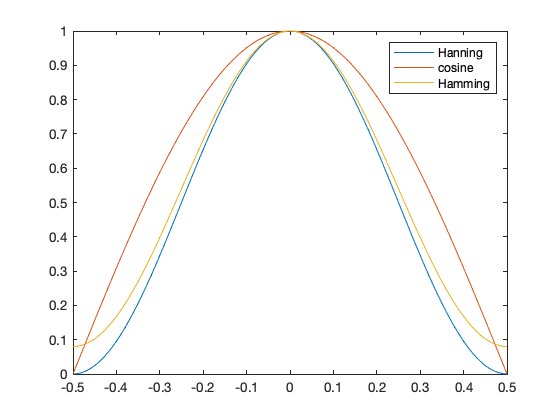

In [8]:
time=-0.5:0.01:0.5;
T=1;
hanwin=cos(pi*time / T).^2;
plot(time,hanwin,time,cos(pi*time/(T)),time,0.54+0.46*cos(2*pi*time/T))
legend('Hanning','cosine','Hamming')

You can see the frequency response of these in Emory and Thomson section 5.6.6.

So how do you use a window?

1. First you must demean your data-otherwise, the window will shift energy from the mean into other frequencies.  If you're working in segments, you should demean (and detrend) each segment before you do anything further.

2. Second, for a segment with $N$ points, multiply by a window that is $N$ points wide.

3. Since the window attenuates the impact of the edge of each segment, you can use segments that overlap (typically by 50\%).  This will give you (almost) twice as many segments, so instead of $\nu$ degrees some larger number.
4. Now Fourier transform, scale appropriately (e.g. by $\sqrt{8/3}$ for a Hanning window, to account for energy attenuation) and compute amplitudes.

Will the window preserve energy in your system?  Not necessarily.  You can
normalize it appropriately, but windowing can shift the background energy
level of your spectrum relative to the spectral peaks,
and you'll want to keep track of this.

**Exercises**

What are the Fourier transforms of the following functions:
$x(t)=1, x(t)=\cos(2\pi f t), x(t)=\sin(2\pi f t), x(t)=\exp(-t^2/2\sigma^2),
x(t)=t$?

In our examples, note that the Fourier transforms of single frequency sine and
cosine give a single peak.  (This uses the Kronecker delta, $\delta_{nm}$.)
The Gaussian ($x_f(t)$), has a transform of a Gaussian, though it's a bit distorted
in this finite-length log-log domain.  Formally if $x_f(t) = e^{-t^2/(2\sigma^2)}$,
then $X_f(f)=\sqrt{2\pi}\sigma e^{-2\pi^2 f^2 \sigma^2}$ or with coefficients $x_f(t)= \sqrt{\alpha/\pi} e^{-\alpha t^2}$ corresponds to $X_f(f)=e^{-\pi^2 f^2/(a)}$, which says in essence that the
Fourier transform of a Gaussian is still a Gaussian.  The normalization for this
is dependent on our exact notation for the Fourier transform.  And the linear
pattern should really be thought of as a repeating sawtooth.  Its Fourier
transform is a dramatically red spectrum.  What does this mean for the
Fourier transform of any long-term trend?



**Windowing and overlapping segments**

So a quick recap.  When we filter, we convolve the filter with our
data in the time domain, which is equivalent to multiplying in the
frequency domain.  When we window, we multiply by a tapered window
in the time domain, which is equivalent to convolving in the frequency
domain.

How many degrees of freedom do you have for M overlapping windows?  Not
$2M$, but close to that, because the correlation of adjacent chunks is reduced because the windows emphasize data towards the center of the window.  As a rule of thumb, Bendat and Piersol say that overlapping
by 50\% will recover about 90\% of the stability lost due to tapering.

The windowed spectra that we've discussed as a basic approach in class are
referred to by a number of names in the literature.  Some textbooks refer
to windowing as "tapering."  And the formal method is sometimes called
the Welch method.  Percival and Walden (*Spectral Analysis for
Physical Applications*, Cambridge University Press, 1993) provide
a detailed discussion of this approach under the name "Welch's
Overlapping Segment Averaging (WOSA)."

Our overarching concern is that we adhere to Parseval's theorem.  Since the
window default normalization can reduce the variance, this will typically 
require that we scale up appropriately
to conserve energy/variance (e.g. by $\sqrt{8/3}$ for
a Hanning window).  How do you find this scale factor?  One way is to 
sum over a wide window.  For example:

In [5]:
N=10000;
[sum(hanning(N).^2)/N 3/8]
[sum(hamming(N).^2)/N 0.3974]


ans =

    0.3750    0.3750


ans =

    0.3974    0.3974



Will the window preserve energy in your system?  Not necessarily.  You can
normalize it appropriately, but windowing can shift the background energy
level of your spectrum relative to the spectral peaks,
and you'll want to keep track pay attention to the possibility of biases resulting from the windowing procedure.

**How many degrees of freedom do we have?**

We've got a full recipe, but how many degrees 
of freedom do we really have?

We'll try to sort this out today, along with venturing into Monte Carlo simulation.

Once you've created overlapping, windowed segments, then you'll need to
figure out how many independent segments you really have.  Clearly
at a minimum you should have the equivalent of the number of segments that
you would have if you did no overlapping.  If you have $N$ data points
divided into segments that are 2$M$ wide, then the minimum number of segments
is $N/(2M)$.  But with windowing, the end points of each segment are used
less than the middle, making the overlapping segments more independent, so perhaps we have more degrees of freedom.  Since the segments overlap by 50\%,
we probably can't treat them as being independent. Bendat and Piersol usefully say that overlapping
by 50\% will recover about 90\% of the stability lost due to tapering.
How much
does the use of overlapping segments modulate the degrees of freedom?

 If you look this up in the 2nd
edition of Emery and Thomson, you find a nice table (their Table 5.6.4),
ostensably lifted from Priestley. Priestley's results are nicely
discussed by Koopmans (*The Spectral Analysis of Time Series*,
Academic Press, 1974).  Emery and Thomson describe the table as representing
the equivalent degrees of freedom for windowed "block averaged"
spectra.

A little further exploration of the literature shows that the values in Emery and Thomson's
table are incorrectly labeled and actually represent degrees of freedom
for spectra determined by filtering or averaging adjacent frequencies
from an initial spectral estimate.
If you filter in frequency, you can increase your degrees of freedom
just the way you increase degrees of freedom by using multiple segments.
And you can refine your filtering to reduce spectral ringing effects by
using a carefully constructed filter.  While people use the same types
of filters for time domain windowing/tapering and for frequency domain
filtering, the effect is not identical.  (If we wanted an identical effect,
we'd need to use the Fourier transform of the time domain window to filter
in the frequency domain.  You could do that, but it's not what we usually
envision when we talk about windowing or tapering, and it's not what Emery and
Thomson seem to describe.)  What this
means is that the tables of "equivalent degrees of freedom" for the
frequency domain don't actually work for windowed time domain data.

So at this point we have three options:

1. Abandon windowing and filter in the frequency domain, so that we can take advantage of the correct estimates of degrees of freedom.  This is a possibility, and we'll get to it, but it seems like we're unnecessarily giving up on the windowing approach that we've been exploring.

2. Use a brute strength approach---Monte Carlo simulation---to figure out how many degrees of freedom we have.

3. Find an analytic solution to decide how many degrees of freedom we have.



**Monte Carlo simulation:  How to avoid the traps imposed by standard statistical 
assumptions (and how to fake your way as a statistician through computational inefficiency
rather than clever mathematics)**

Most of the time, we estimate spectral error bars using basic statistical assumptions---that 
data are normally distributed, that we have enough samples for the central limit theorem to
apply, that statistics are stationary.  These assumptions make our statistical models
tractable---we end up with equations we can manipulate, allowing us (or clever statisticians
100 years ago) to derive simple equations that give us rules for how systems should behave.
But what happens when those assumptions break down?  Or what happens when we have little doubts
about the validity of the statistical model.  We can always resort to a Monte Carlo process.
In Monte Carlo methods, we throw theory on its head and use an empirical approach to generate
many realizations of our data set, with noise appropriate to our problem. 

As an example, consider the problem of determining the standard error of the mean.
When we discussed it in class, we did a quick derivation to show that the standard 
error of the mean is $\sigma/\sqrt{N}$, where $\sigma$ is the standard deviation and
$N$ is the effective degrees of freedom.  But what if I didn't trust this estimate?
I could generate a large number of realizations of my data with noise typical of the real
data, compute means for each realization, and look at the statistics of those values.

So let's put this to work.  Suppose I'm computing the mean of $N=500$ data points.  With one
sample, I can compute the mean $\mu$ and standard deviation $\sigma$, and standard error 
$\sigma/\sqrt{500}$.  But I might wonder
if $\mu$ is really representative.  So I can generate an ensemble of fake data, perhaps 100
data sets based on adding Gaussian white noise (or non-Gaussian white noise) to the real data.
Each of these data sets will have a mean $\mu_i$ and a standard deviation $\sigma_i$.  And I can
look at the standard deviation of all of the $\mu_i$ values.  I can also look at the pdf of
my $\mu_i$'s and other higher order statistics.
For example:

In [16]:
A=randn(500,100);
mu=mean(A);
sigma_A=std(A);
std_A=sigma_A/sqrt(500);
[std(mu) mean(std_A)] % compare standard deviation of means
          %  vs standard error


ans =

    0.0438    0.0445



Now we could expand on our example and ask, what if our noise were non-Gaussian, correlated, gappy
or had other problems, and we could adjust our Monte Carlo process appropriately.  And importantly, we can use this approach to test windowing strategies, by 
generating fake data with a white spectrum (or a known red or other spectral form), windowing,
segmenting, and evaluating the statistics of the solution---the standard deviation in log space---relative to the formal error bar.

This, by the way, is the basis of other general techniques for determining error bars that you'll see; namely, bootstrapping and jackknifing.
